In [ ]:
import numpy as np # rename the library to np for convenience
import matplotlib.pyplot as plt # we want the "pyplot" module

from IPython.display import Audio # listening to audio
from skimage import io # image i/o
from skimage import transform # image transformations
from scipy import signal
from scipy.io import wavfile # audio i/o

# allows plots to display in the notebook instead of another window
%matplotlib inline

<>:11: SyntaxWarning: invalid escape sequence '\o'
<>:11: SyntaxWarning: invalid escape sequence '\o'
C:\Users\Orion\AppData\Local\Temp\ipykernel_19464\403915554.py:11: SyntaxWarning: invalid escape sequence '\o'
  plt.xlabel('$\omega$')


Text(0.5, 0, 'time')

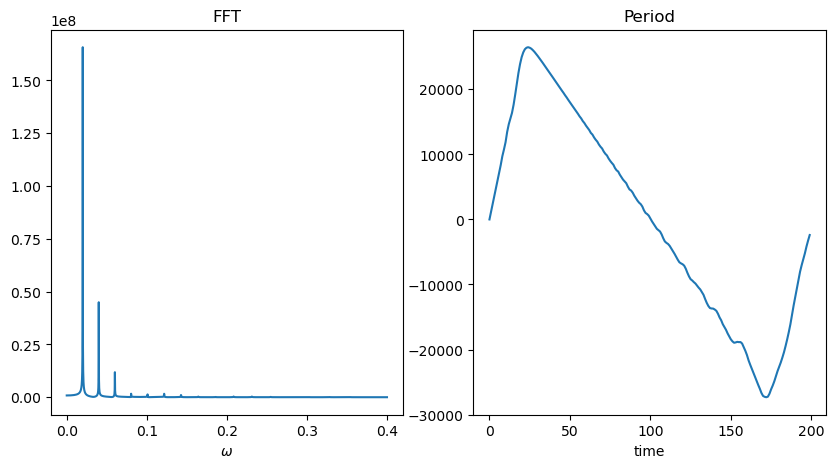

In [35]:
#fs = 48000
fs, sound = wavfile.read('23d.wav')
sound = sound[0:30000]
sound_fft = np.fft.rfft(sound)[0:3000]
freq = np.linspace(0, 0.4, len(sound_fft))
table = np.zeros(128)
plt.figure(figsize=(10, 5))
plt.subplot(121)
plt.plot(freq, abs(sound_fft))
plt.title('FFT')
plt.xlabel('$\omega$')
plt.subplot(122)
plt.plot(sound[0:200])
plt.title('Period')
plt.xlabel('time')



7'd 0 : amp_out<=8'd 127
7'd 1 : amp_out<=8'd 133
7'd 2 : amp_out<=8'd 144
7'd 3 : amp_out<=8'd 150
7'd 4 : amp_out<=8'd 162
7'd 5 : amp_out<=8'd 167
7'd 6 : amp_out<=8'd 179
7'd 7 : amp_out<=8'd 184
7'd 8 : amp_out<=8'd 198
7'd 9 : amp_out<=8'd 206
7'd 10 : amp_out<=8'd 212
7'd 11 : amp_out<=8'd 228
7'd 12 : amp_out<=8'd 236
7'd 13 : amp_out<=8'd 247
7'd 14 : amp_out<=8'd 251
7'd 15 : amp_out<=8'd 255
7'd 16 : amp_out<=8'd 255
7'd 17 : amp_out<=8'd 254
7'd 18 : amp_out<=8'd 251
7'd 19 : amp_out<=8'd 250
7'd 20 : amp_out<=8'd 247
7'd 21 : amp_out<=8'd 245
7'd 22 : amp_out<=8'd 242
7'd 23 : amp_out<=8'd 240
7'd 24 : amp_out<=8'd 237
7'd 25 : amp_out<=8'd 233
7'd 26 : amp_out<=8'd 231
7'd 27 : amp_out<=8'd 228
7'd 28 : amp_out<=8'd 226
7'd 29 : amp_out<=8'd 223
7'd 30 : amp_out<=8'd 221
7'd 31 : amp_out<=8'd 218
7'd 32 : amp_out<=8'd 214
7'd 33 : amp_out<=8'd 212
7'd 34 : amp_out<=8'd 209
7'd 35 : amp_out<=8'd 207
7'd 36 : amp_out<=8'd 204
7'd 37 : amp_out<=8'd 202
7'd 38 : amp_out<=8'd 

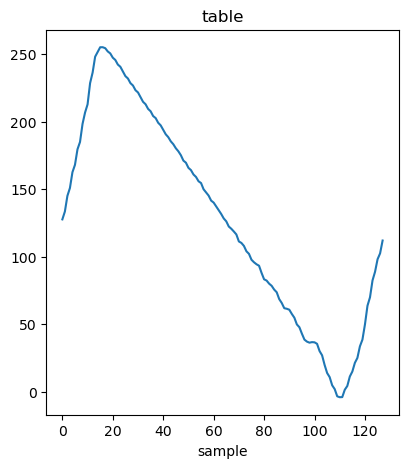

In [36]:
for i in range(128):
    table[i] = sound[int(i*1.5625)]
table = (table/207) + (255/2)
plt.figure(figsize=(10, 5))
plt.subplot(121)
plt.plot(table)
plt.title('table')
plt.xlabel('sample')
Audio(data=sound, rate=fs)

for i in range(128):
    print("7'd",i, ": amp_out<=8'd",int(table[i]))